####Lukas Mosser

In [1]:
import numpy as np
from math import factorial
import pandas as pd

##Computation of Stehfest Coefficients

In [2]:
stehfest_coeffs = np.zeros((19, len(range(2, 20, 2))))
for N_col, N in enumerate(range(2, 20, 2)):
    for i_col, i in enumerate(range(1, N+1)):
        V_i = 0.
        for k in range(int(np.floor((i+1)/2.)), int(min(i, N/2.))+1):
            V_i += (np.power(k, N/2.)*factorial(2*k))/(factorial(N/2.-k)*
                    factorial(k)*factorial(k-1)*factorial(i-k)*factorial(2*k-i))        
        V_i *= np.power(-1, N/2.+i)
        stehfest_coeffs[i_col][N_col] = V_i

data = pd.DataFrame(stehfest_coeffs)
#data.to_excel("stehfest_coeffs.xls", sheet_name='Coefficients')

Results presented in accompanying excel sheet.

##Inversion of given function:

$$\widetilde{P_{D}}(r_{D}, s)=\frac{1}{s}K_{0}(r_{D}\sqrt{s})$$

Using the given Gaver-Stehfest algorithm the required sum can be simplified to:
$$P_{D}(r_{D}, t_{D}) = \sum\limits_{i=1}^N \frac{V_{i}}{i}K_{0}[\sqrt{i\frac{r_{D}^2}{t_{D}} ln(2)}] $$

In [3]:
from scipy.special import kn

In [4]:
pD_rD_tD_N_4 = []
val = 0.
td_rd_2 = np.array([1e-2, 2e-2, 4e-2, 6e-2, 8e-2,
           1e-1, 2e-1, 4e-1, 6e-1, 8e-1,
           1e0, 2e0, 4e0, 6e0, 8e0,
           1e1, 2e1, 4e1, 6e1, 8e1,
           1e2, 2e2, 4e2, 6e2, 8e2,
           1e3, 2e3, 4e3, 6e3, 8e3,
           1e4])
inversion = np.zeros((len(td_rd_2), 4))
inversion[:,0] = td_rd_2
for N_true, N_index, inv_index in zip([4, 10, 18], [1, 4, 8], [0, 1, 2]):
    pD = []
    for k, time_step in enumerate(td_rd_2):
        val = 0.
        row = []
        for i in range(N_true):
            val += stehfest_coeffs[i][N_index]*1./(i+1)*\
                    kn(0, np.sqrt((i+1)*np.log(2)/time_step))
            row.append(stehfest_coeffs[i][N_index]*1./(i+1)*\
                    kn(0, np.sqrt((i+1)*np.log(2)/time_step)))          
        inversion[k][inv_index+1] = val
#print inversion

##Plot of inverted function on log-log plot and semi-log approximation

$$\frac{t_{D}}{r_{D}^2} \ in \ range \ [1e-2 \ , \ 1e4] \ (5 \ points \ per \ log-cycle)$$
Using the semi-log approximation for $P_{D}$:
$$P_{D}=0.5(ln\frac{t_{D}}{r_{D}^2}+0.80907)$$

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

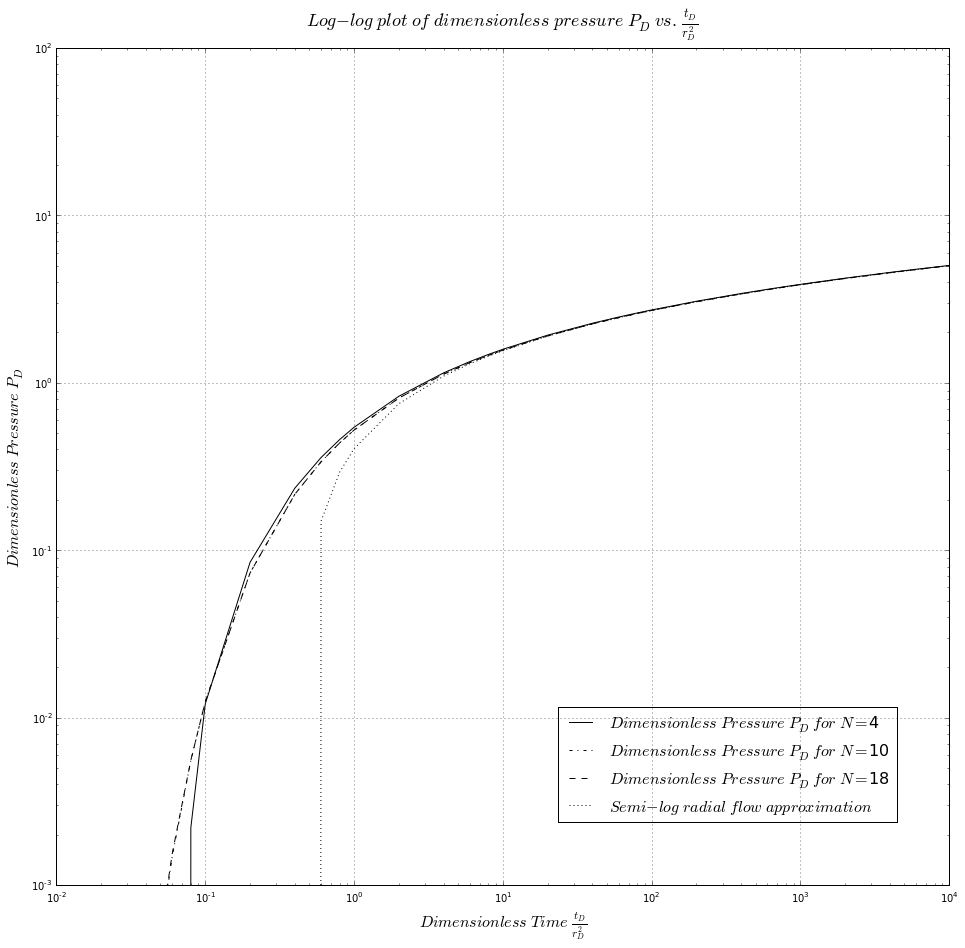

In [6]:
fig, ax = plt.subplots(figsize=(16,15))
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-2,right=10000.0)
ax.set_ylim(bottom=1e-3, top=1e2)
ax.set_title(r'$Log-log \ plot \ of \ dimensionless \ pressure \ P_{D} \ vs. \ \frac{t_{D}}{r_{D}^2}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{r_{D}^2}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, N, linest in zip([1, 2, 3], [4, 10, 18], ['-', '-.', '--']):
    ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", label='$Dimensionless \ Pressure \ P_{D} \ for \ N=$'+str(N),
            linestyle=linest)
    
ax.plot(inversion[:, 0], 0.5*(np.log(inversion[:, 0])+0.80907),
        color="black", label='$Semi-log \ radial \ flow \ approximation$',
        linestyle=":")    
plt.grid()
plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
plt.show()

##Plot of inverted function on semi-log plot and semi-log approximation

$$\frac{t_{D}}{r_{D}^2} \ in \ range \ [1e-2 \ , \ 1e4] \ (5 \ points \ per \ log-cycle)$$
Using the semi-log approximation for $P_{D}$:
$$P_{D}=0.5(ln\frac{t_{D}}{r_{D}^2}+0.80907)$$

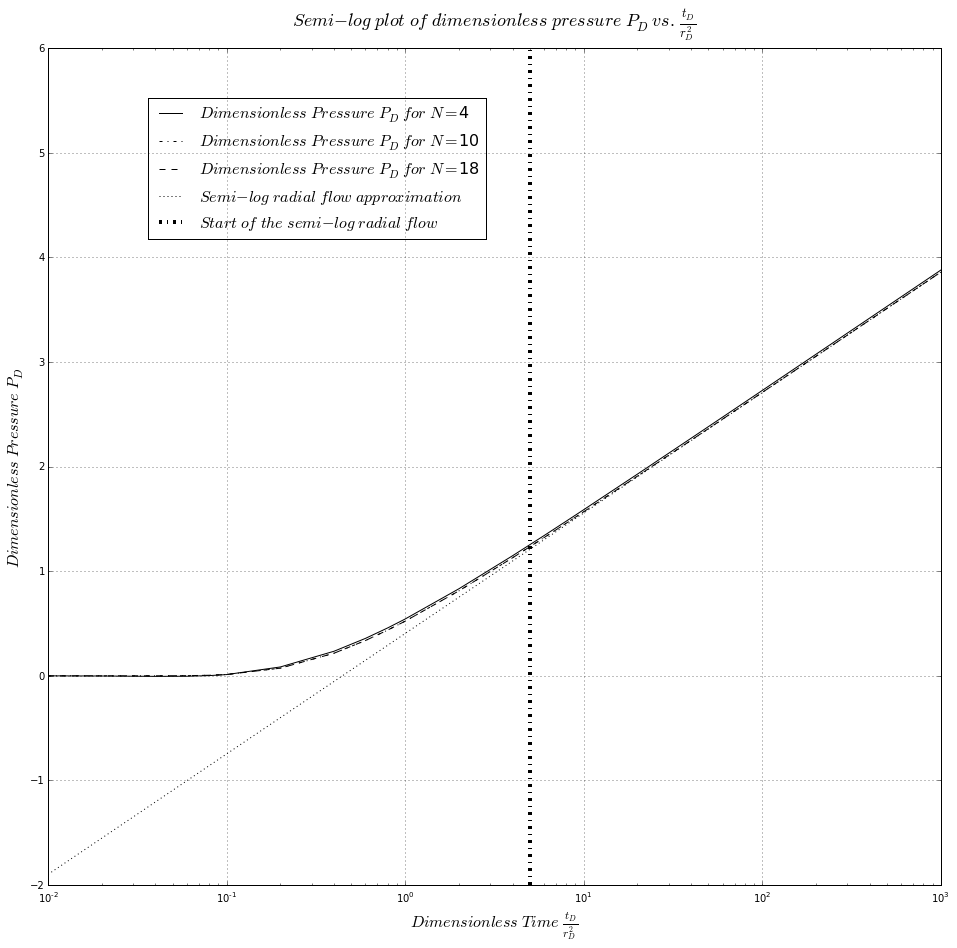

In [7]:
fig, ax = plt.subplots(figsize=(16,15))
ax.set_xscale('log', basex=10)
ax.set_xlim(left=1e-2,right=1000.0)

ax.set_title(r'$Semi-log \ plot \ of \ dimensionless \ pressure \ P_{D} \ vs. \ \frac{t_{D}}{r_{D}^2}$', 
             fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{r_{D}^2}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, N, linest in zip([1, 2, 3], [4, 10, 18], ['-', '-.', '--']):
    ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", label='$Dimensionless \ Pressure \ P_{D} \ for \ N=$'+str(N),
            linestyle=linest)

ax.plot(inversion[:, 0], 0.5*(np.log(inversion[:, 0])+0.80907),
        color="black", label='$Semi-log \ radial \ flow \ approximation$',
        linestyle=":")
    
ax.axvline(5, color="black", linestyle="-.", label='$Start \ of \ the \ semi-log \ radial \ flow$', 
           linewidth=4)
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.45, 0.3, .5), fontsize=16)
plt.show()

We identify the start of semi-log radial flow at $$\frac{t_{D}}{r_{D}^2} = 5$$
(radial flow dominates the flow behavior => semi-log approximation valid)